# Data Science Challenge - Churn Prediction
Tianqi Zhang

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

%matplotlib inline

In [2]:
df = pd.read_csv('churn.csv')

In [3]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,phone_no_phone,churn
0,3.67,5.0,4.7,1.10,15.4,4,1,46.2,0.0,1.0,0.0,0.0,1.0,0.0,0
1,8.26,5.0,5.0,1.00,0.0,0,0,50.0,1.0,0.0,0.0,1.0,0.0,0.0,1
2,0.77,5.0,4.3,1.00,0.0,3,0,100.0,1.0,0.0,0.0,0.0,1.0,0.0,1
3,2.36,4.9,4.6,1.14,20.0,9,1,80.0,0.0,1.0,0.0,0.0,1.0,0.0,0
4,3.13,4.9,4.4,1.19,11.8,14,0,82.4,0.0,0.0,1.0,1.0,0.0,0.0,1


In [4]:
df.shape

(50000, 15)

In [5]:
df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,phone_no_phone,churn
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.779050,4.650038,1.074764,8.849536,2.278200,0.37708,60.926084,0.330680,0.202600,0.466720,0.300440,0.691640,0.007920,0.623920
std,5.707357,0.445974,0.575601,0.222336,19.958811,3.792684,0.48466,37.081503,0.470463,0.401941,0.498896,0.458454,0.461821,0.088642,0.484405
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.500000,1.000000,0.000000,0.000000,0.00000,33.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,0.00000,66.700000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,1.00000,100.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,1.00000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Exploratory Analysis

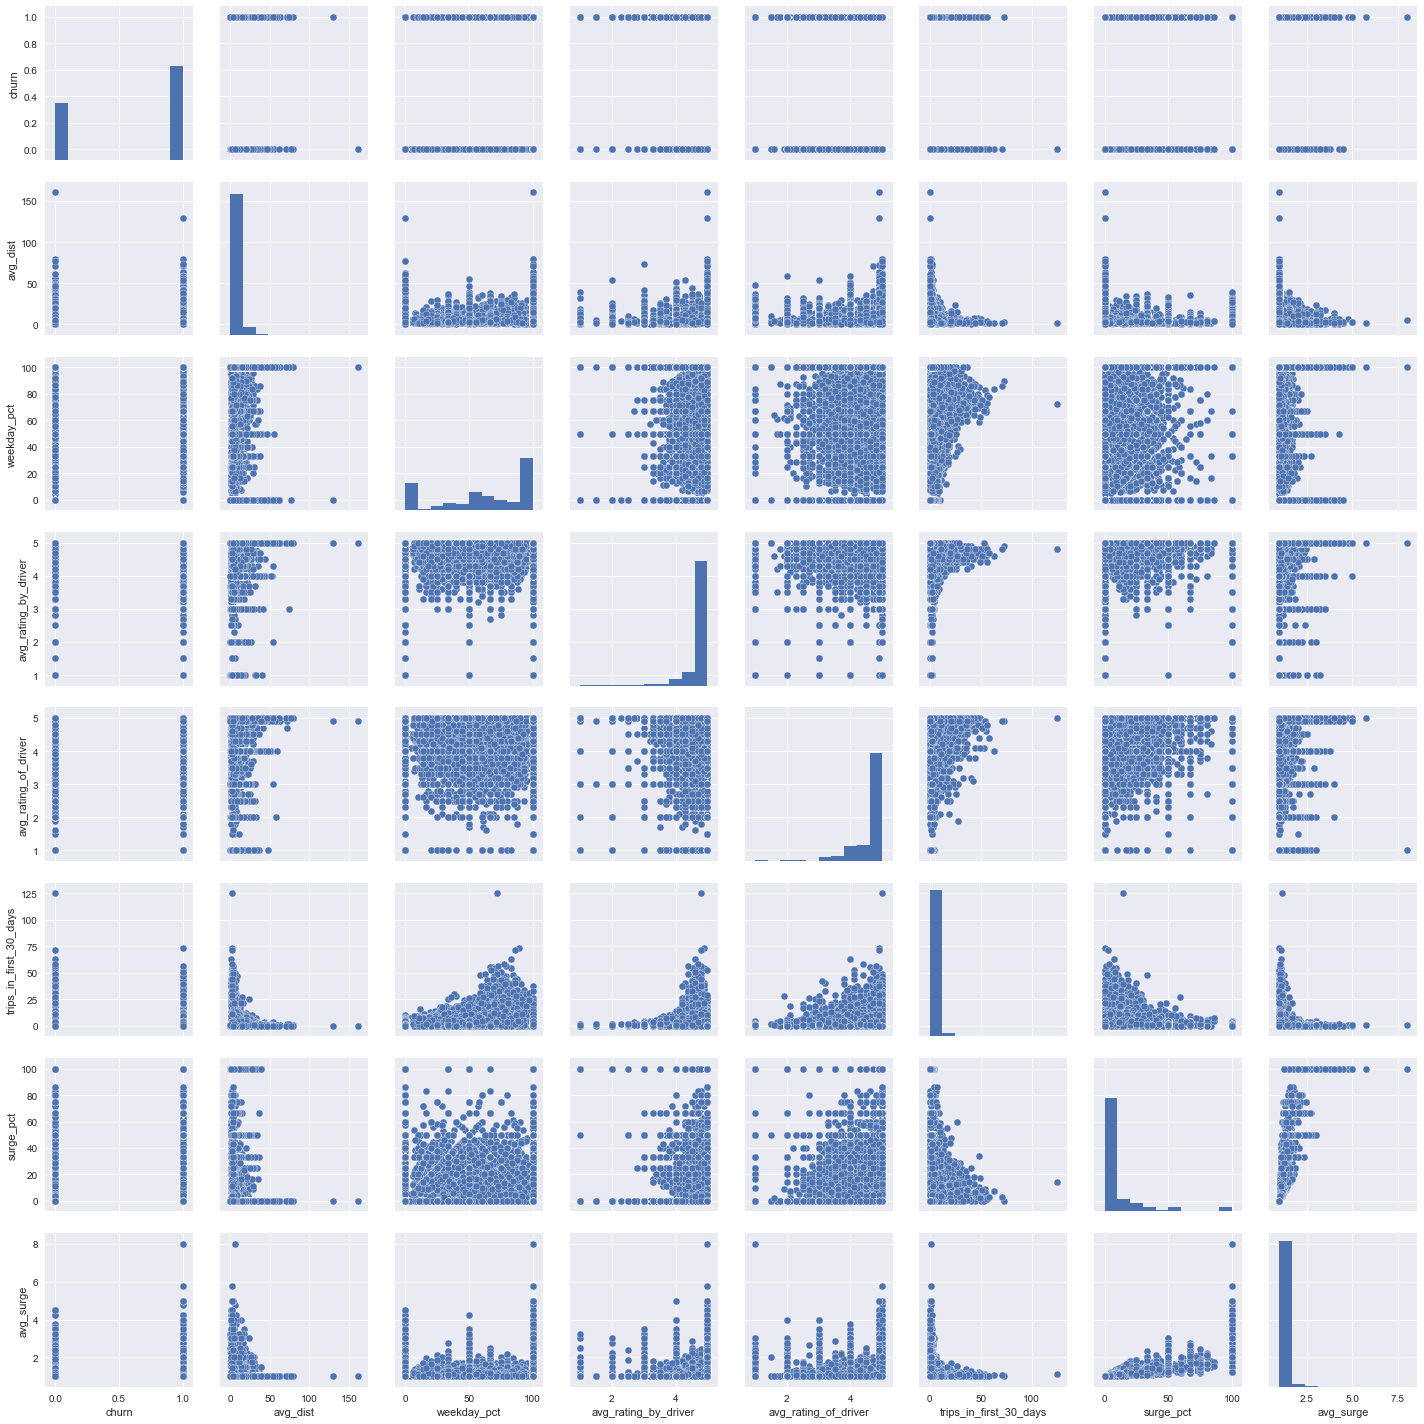

In [63]:
sns.set()
cols = ['churn', 'avg_dist', 'weekday_pct', 'avg_rating_by_driver', 'avg_rating_of_driver', 'trips_in_first_30_days',
       'surge_pct','avg_surge']
sns.pairplot(df[cols], size = 2.5)
plt.savefig('scatter_matrix')
plt.show()

In [149]:
# adjust figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 7, 5

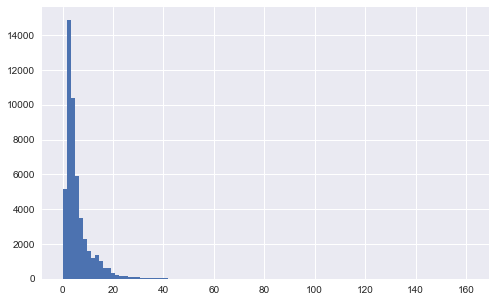

In [132]:
# distribution of avg_dist
plt.hist(df.avg_dist,bins=100)
plt.savefig('avg_dist_distribution')
plt.show()

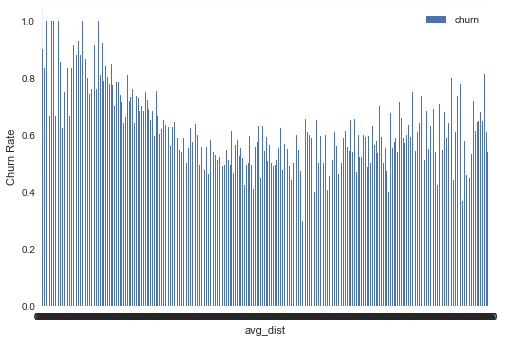

In [105]:
# churn rate split by avg_dist
ax = df[['avg_dist','churn']][df.avg_dist<7].groupby('avg_dist').mean().plot.bar(rot=0)
ax.set_ylabel('Churn Rate')
plt.savefig('avg_dist_churn')
plt.show()

In [10]:
# two sample t test split by churn and non_churn
stats.ttest_ind(df['avg_dist'][df.churn==1],df['avg_dist'][df.churn==0])

Ttest_indResult(statistic=20.835664785131105, pvalue=5.2709763614964544e-96)

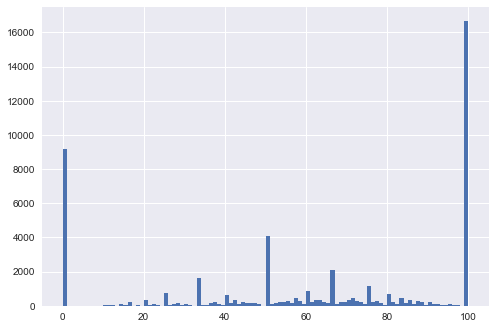

In [106]:
plt.hist(df.weekday_pct,bins=100)
plt.savefig('weekday_pct_distribution')
plt.show()

In [133]:
# construct new feature depending on weekday frequency
conditions = [
    (df['weekday_pct'] == 0),
    (df['weekday_pct'] == 100)]
choices = ['never', 'always']
df['weekday_frequency'] = np.select(conditions, choices, default='sometimes')

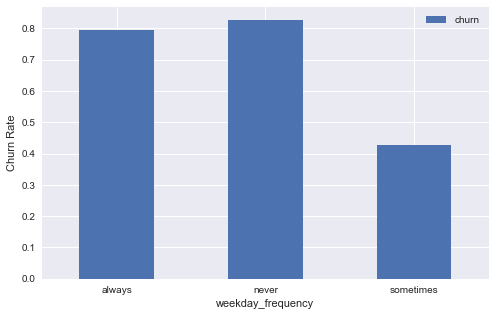

In [134]:
ax = df[['weekday_frequency','churn']].groupby('weekday_frequency').mean().plot.bar(rot=0)
ax.set_ylabel('Churn Rate')
plt.savefig('weekday_frequency')
plt.show()

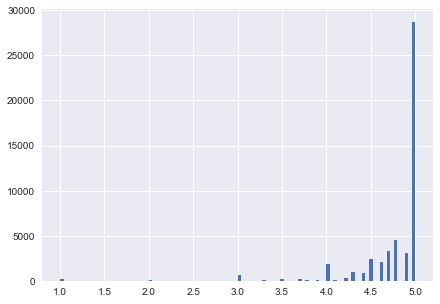

In [159]:
plt.hist(df.avg_rating_by_driver,bins=100)
plt.show()

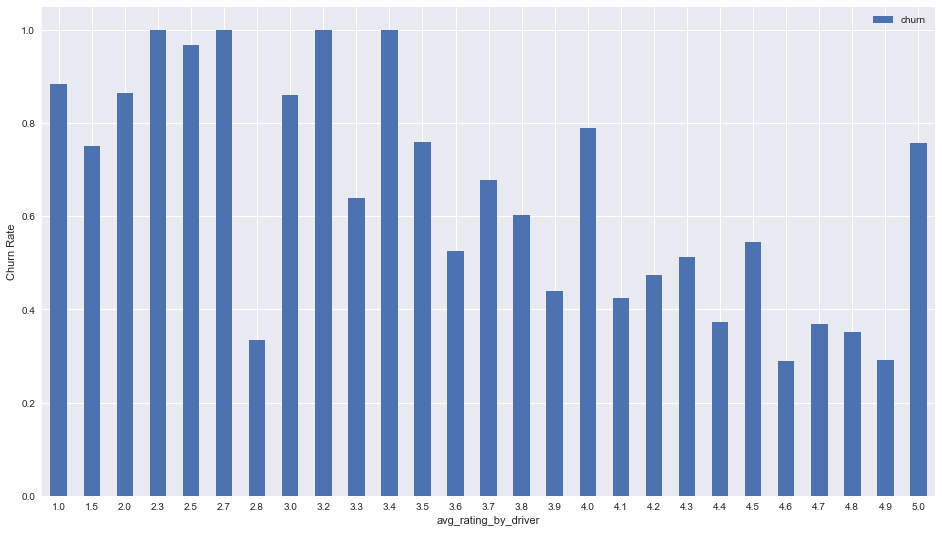

In [130]:
ax = df[['avg_rating_by_driver','churn']].groupby('avg_rating_by_driver').mean().plot.bar(rot=0)
ax.set_ylabel('Churn Rate')
plt.savefig('avg_rating_by_driver')
plt.show()

In [16]:
# two sample t test
stats.ttest_ind(df['avg_rating_by_driver'][df.churn==1],df['avg_rating_by_driver'][df.churn==0])

Ttest_indResult(statistic=6.1621224754930983, pvalue=7.2322531540530538e-10)

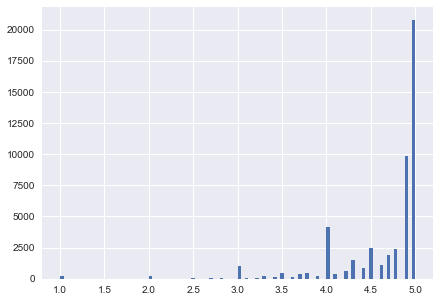

In [160]:
plt.hist(df.avg_rating_of_driver,bins=100)
plt.show()

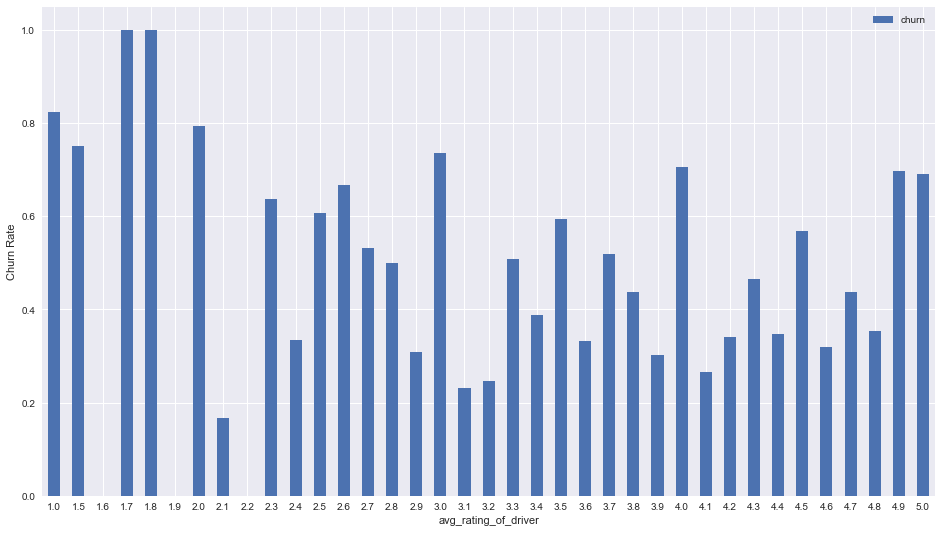

In [18]:
ax = df[['avg_rating_of_driver','churn']].groupby('avg_rating_of_driver').mean().plot.bar(rot=0)
ax.set_ylabel('Churn Rate')
plt.show()

In [19]:
# two sample t test
stats.ttest_ind(df['avg_rating_of_driver'][df.churn==1],df['avg_rating_of_driver'][df.churn==0])

Ttest_indResult(statistic=9.1936818916924778, pvalue=3.9374105606735085e-20)

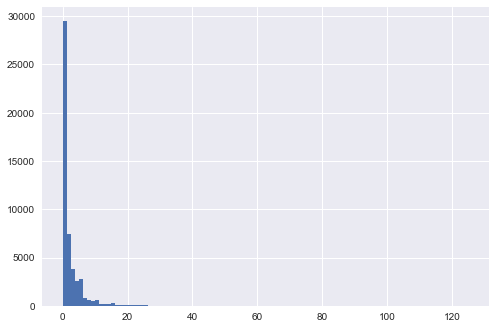

In [111]:
plt.hist(df.trips_in_first_30_days,bins=100)
plt.savefig('trips_in_first_30_days_dis')
plt.show()

In [90]:
len(df[df.trips_in_first_30_days==0])

15390

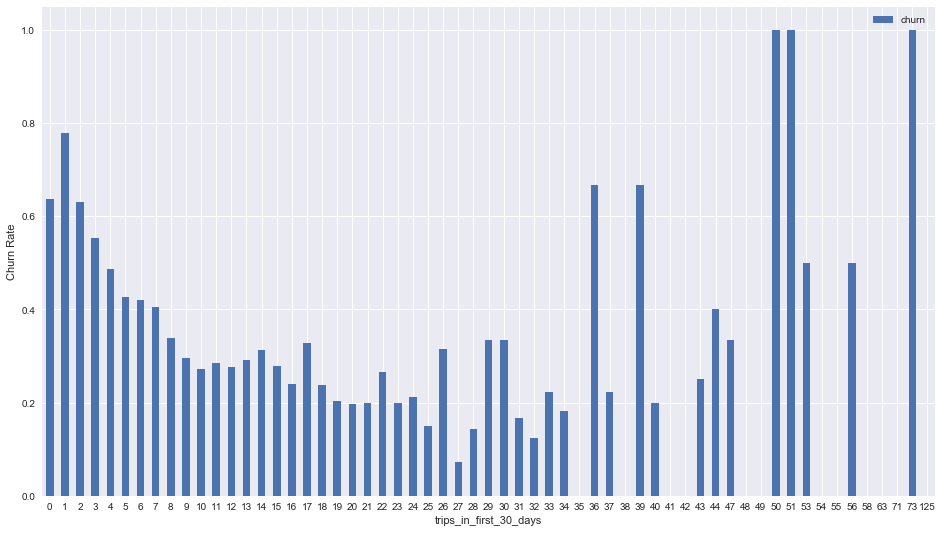

In [123]:
ax = df[['trips_in_first_30_days','churn']].groupby('trips_in_first_30_days').mean().plot.bar(rot=0)
ax.set_ylabel('Churn Rate')
plt.savefig('trips_in_first_30_days_churn')
plt.show()

In [125]:
# construct new feature depending on weekday frequency
conditions = [
    (df['trips_in_first_30_days'] <= 4),
    (df['trips_in_first_30_days'] > 30)]
choices = ['low', 'high']
df['trip_frequency_in_first_30_days'] = np.select(conditions, choices, default='medium')


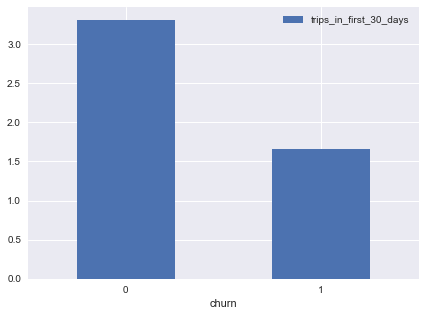

In [152]:
df[['trips_in_first_30_days','churn']].groupby('churn').mean().plot.bar(rot=0)

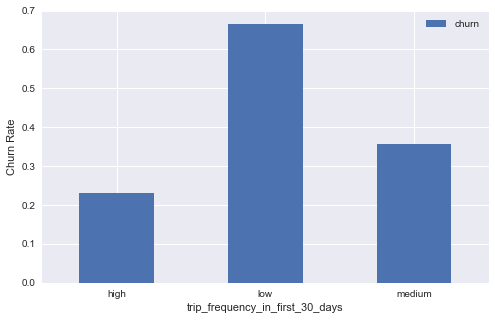

In [135]:
ax = df[['trip_frequency_in_first_30_days','churn']].groupby('trip_frequency_in_first_30_days').mean().plot.bar(rot=0)
ax.set_ylabel('Churn Rate')
plt.savefig('trip_frequency_in_first_30_days')
plt.show()

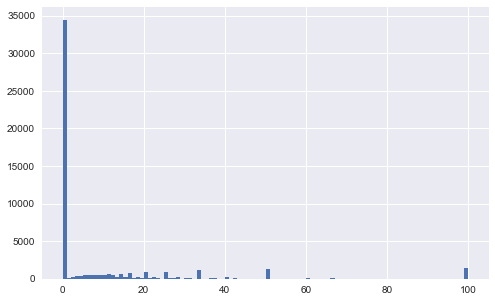

In [141]:
plt.hist(df.surge_pct,bins=100)
plt.savefig('surge_pct')
plt.show()

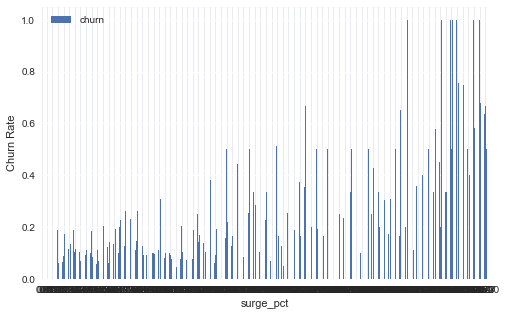

In [143]:
ax = df[['surge_pct','churn']].groupby('surge_pct').mean().plot.bar(rot=0)
ax.set_ylabel('Churn Rate')
plt.savefig('surge_pct_churn')
plt.show()

In [28]:
df_surge = df[['surge_pct','churn']].groupby('surge_pct').mean()
df_surge[df_surge.churn==1]

,churn
surge_pct,
27.9,1.0
34.1,1.0
34.7,1.0
42.4,1.0
45.2,1.0
45.8,1.0
47.8,1.0
55.0,1.0
59.5,1.0


In [137]:
# contruct new feature that indicate if frequency of experienceing surge
df['surge_frequency'] = 'low'
df['surge_frequency'][df.surge_pct > 25] = 'high'


/Users/zhangtianqi/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [30]:
# contruct new feature that indicate if experience surge or not
df['surge_or_not'] = 0
df['surge_or_not'][df.surge_pct > 0] = 1

/Users/zhangtianqi/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [31]:
df[['surge_frequency','churn']].groupby('surge_frequency').count()

,churn
surge_frequency,
high,5429
low,44571


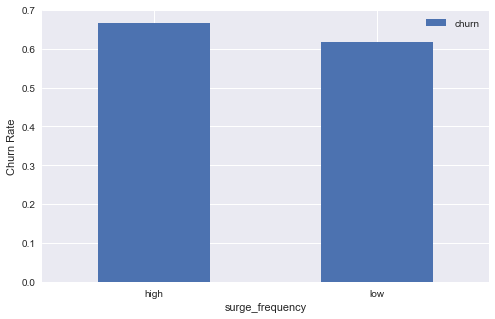

In [139]:
ax = df[['surge_frequency','churn']].groupby('surge_frequency').mean().plot.bar(rot=0)
ax.set_ylabel('Churn Rate')
plt.savefig('surge_frequency')
plt.show()

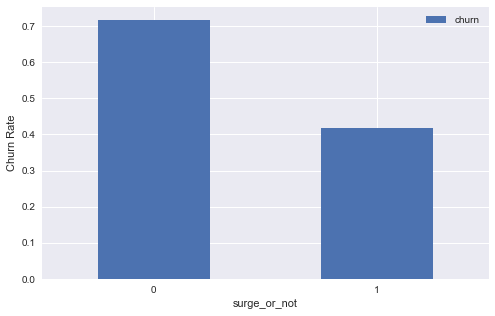

In [140]:
ax = df[['surge_or_not','churn']].groupby('surge_or_not').mean().plot.bar(rot=0)
ax.set_ylabel('Churn Rate')
plt.savefig('surge_or_not')
plt.show()

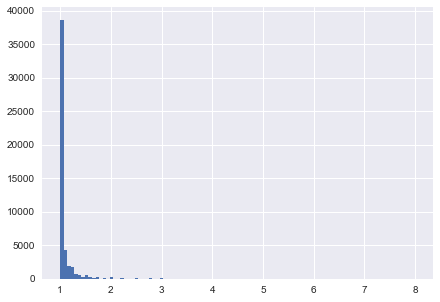

In [153]:
plt.hist(df.avg_surge,bins=100)
plt.show()

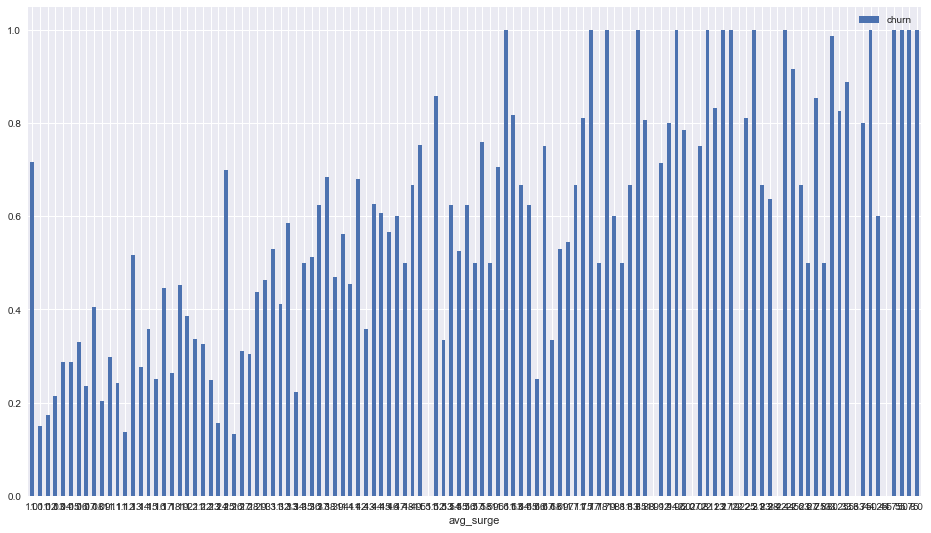

In [35]:
df[['avg_surge','churn']].groupby('avg_surge').mean().plot.bar(rot=0)

In [36]:
df_avg_surge = df[['avg_surge','churn']].groupby('avg_surge').mean()
df_avg_surge[df_avg_surge.churn==0]

,churn
avg_surge,
1.51,0.0
1.90,0.0
2.07,0.0
2.20,0.0
2.42,0.0
3.63,0.0
4.50,0.0


In [155]:
# contruct new feature split by avg_surge
df['avg_surge_magnt'] = 'low'
df['avg_surge_magnt'][df.avg_surge > 1.5] = 'high'

/Users/zhangtianqi/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [38]:
stats.ttest_ind(df['avg_surge'][df.churn==1],df['avg_surge'][df.churn==0])# not stat-sig

Ttest_indResult(statistic=0.74529246774186841, pvalue=0.45609843704054653)

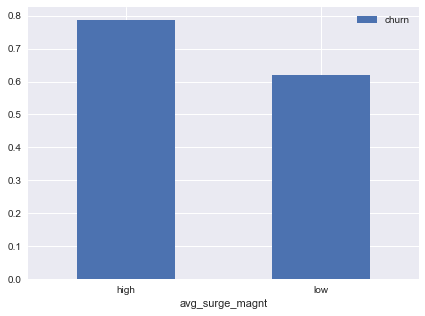

In [156]:
df[['avg_surge_magnt','churn']].groupby('avg_surge_magnt').mean().plot.bar(rot=0)

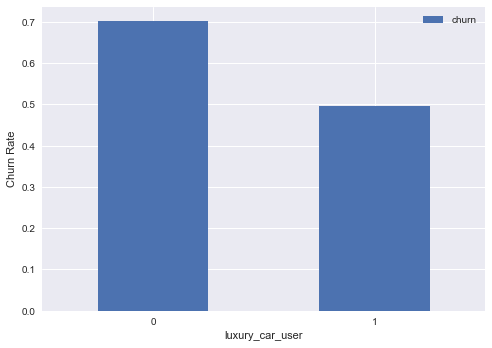

In [157]:
ax = df[['luxury_car_user','churn']].groupby('luxury_car_user').mean().plot.bar(rot=0)
ax.set_ylabel('Churn Rate')
plt.tight_layout()
plt.savefig('luxury_car')
plt.show()

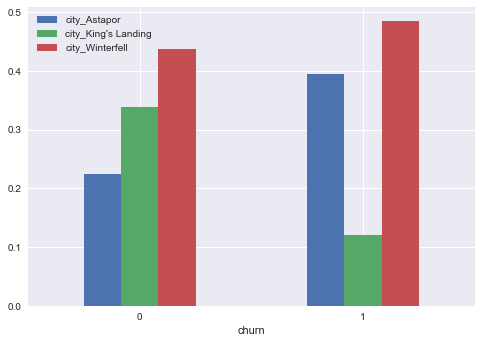

In [110]:
df[['city_Astapor',"city_King's Landing",'city_Winterfell','churn']].groupby('churn').mean().plot.bar(rot=0)
plt.savefig('city')

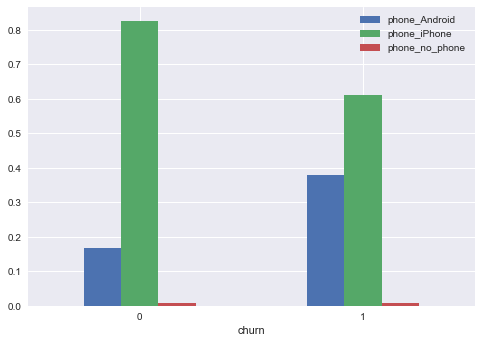

In [109]:
df[['phone_Android',"phone_iPhone",'phone_no_phone','churn']].groupby('churn').mean().plot.bar(rot=0)
plt.savefig('phone')

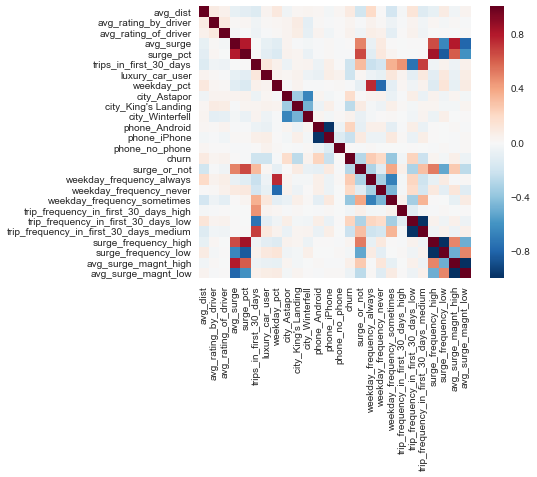

In [158]:
# have a look on correlation matrix of features
corrmat = df.corr()
f, ax = plt.subplots()
sns.heatmap(corrmat, vmax=.8, square=True)

# Build Predictive Models 

In [47]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,phone_no_phone,churn,weekday_frequency,trip_frequency_in_first_30_days,surge_frequency,surge_or_not,avg_surge_magnt
0,3.67,5.0,4.7,1.10,15.4,4,1,46.2,0.0,1.0,0.0,0.0,1.0,0.0,0,sometimes,low,low,1,low
1,8.26,5.0,5.0,1.00,0.0,0,0,50.0,1.0,0.0,0.0,1.0,0.0,0.0,1,sometimes,low,low,0,low
2,0.77,5.0,4.3,1.00,0.0,3,0,100.0,1.0,0.0,0.0,0.0,1.0,0.0,1,always,low,low,0,low
3,2.36,4.9,4.6,1.14,20.0,9,1,80.0,0.0,1.0,0.0,0.0,1.0,0.0,0,sometimes,medium,low,1,low
4,3.13,4.9,4.4,1.19,11.8,14,0,82.4,0.0,0.0,1.0,1.0,0.0,0.0,1,sometimes,medium,low,1,low


In [48]:
df = pd.get_dummies(df)

In [49]:
df.columns

Index([u'avg_dist', u'avg_rating_by_driver', u'avg_rating_of_driver',
       u'avg_surge', u'surge_pct', u'trips_in_first_30_days',
       u'luxury_car_user', u'weekday_pct', u'city_Astapor',
       u'city_King's Landing', u'city_Winterfell', u'phone_Android',
       u'phone_iPhone', u'phone_no_phone', u'churn', u'surge_or_not',
       u'weekday_frequency_always', u'weekday_frequency_never',
       u'weekday_frequency_sometimes', u'trip_frequency_in_first_30_days_high',
       u'trip_frequency_in_first_30_days_low',
       u'trip_frequency_in_first_30_days_medium', u'surge_frequency_high',
       u'surge_frequency_low', u'avg_surge_magnt_high',
       u'avg_surge_magnt_low'],
      dtype='object')

In [50]:
selected_features = [u'avg_dist', u'avg_rating_by_driver', u'avg_rating_of_driver', u'avg_surge', 
                     u'surge_pct', u'trips_in_first_30_days', u'luxury_car_user', 
                     u'weekday_pct', u'city_Astapor', u'city_King\'s Landing',u'city_Winterfell', 
                     u'phone_Android', u'phone_iPhone', u'phone_no_phone', u'surge_or_not', u'weekday_frequency_always',
                     u'weekday_frequency_never', u'weekday_frequency_sometimes',u'trip_frequency_in_first_30_days_high',
                    u'trip_frequency_in_first_30_days_low', u'trip_frequency_in_first_30_days_medium', u'surge_frequency_high',
                    u'surge_frequency_low', u'avg_surge_magnt_high', u'avg_surge_magnt_low']

X = df[selected_features].values
y = df['churn'].values

In [51]:
#split dataset into train set and test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/Users/zhangtianqi/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Logistic Regression

In [53]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_lr = {
 'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]
}
gsearch_lr = GridSearchCV(estimator = LogisticRegression(random_state = 42,penalty = 'l1'), 
 param_grid = param_lr, scoring='roc_auc',iid=False, cv=5)
gsearch_lr.fit(X_train_scaled, y_train)
gsearch_lr.grid_scores_, gsearch_lr.best_params_, gsearch_lr.best_score_


/Users/zhangtianqi/anaconda/lib/python2.7/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.81610, std: 0.00445, params: {'C': 0.001},
  mean: 0.82419, std: 0.00565, params: {'C': 0.01},
  mean: 0.82478, std: 0.00583, params: {'C': 0.1},
  mean: 0.82476, std: 0.00585, params: {'C': 1},
  mean: 0.82476, std: 0.00586, params: {'C': 10},
  mean: 0.82476, std: 0.00586, params: {'C': 100},
  mean: 0.82476, std: 0.00586, params: {'C': 1000}],
 {'C': 0.1},
 0.82477881026704125)

In [55]:
lr = LogisticRegression(C=0.1, penalty='l1',random_state = 42)
lr.fit(X_train_scaled, y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [56]:
y_train_pred_lr = lr.predict(X_train_scaled)
y_test_pred_lr = lr.predict(X_test_scaled)
train_predprob_lr = lr.predict_proba(X_train_scaled)[:,1]
test_predprob_lr = lr.predict_proba(X_test_scaled)[:,1]

In [57]:
from sklearn.metrics import  roc_auc_score
def print_results(y_true , predprob):
    print "AUC Score is:{} ".format(roc_auc_score(y_true, predprob))

In [58]:
print("Training set scores of linear regression:")
print_results(y_train, train_predprob_lr)

Training set scores of linear regression:
AUC Score is:0.825234973348 


In [59]:
print("Test set scores of linear regression:")
print_results(y_test, test_predprob_lr)

Test set scores of linear regression:
AUC Score is:0.820935973611 


In [60]:
df_coeffs = pd.DataFrame(zip(selected_features, lr.coef_.flatten())).sort_values(by=[1], ascending=False)
df_coeffs.columns = ['feature', 'coeff']
df_coeffs

,feature,coeff
15,weekday_frequency_always,0.332033
4,surge_pct,0.292953
11,phone_Android,0.284829
8,city_Astapor,0.276556
19,trip_frequency_in_first_30_days_low,0.100463
5,trips_in_first_30_days,0.100295
0,avg_dist,0.073096
1,avg_rating_by_driver,0.056607
21,surge_frequency_high,0.053130
2,avg_rating_of_driver,0.014573


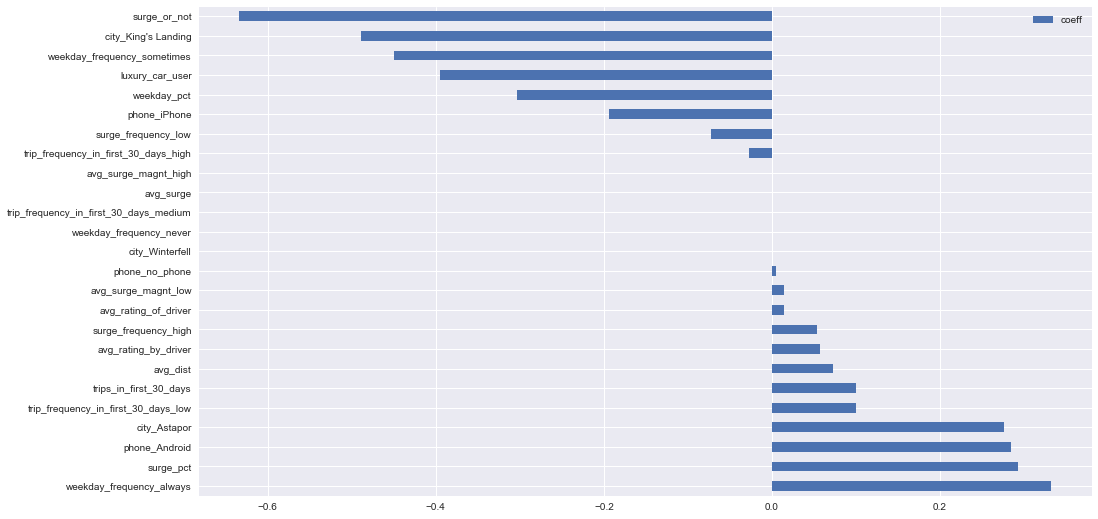

In [61]:
ax = df_coeffs.plot.barh()
t = np.arange(X.shape[1])
ax.set_yticks(t)
ax.set_yticklabels(df_coeffs['feature'])
plt.show()

## Random Forest

In [62]:
from sklearn.ensemble import RandomForestClassifier

param_rf = {
 'criterion':['gini','entropy'],
 'max_features':['auto','log2',0.2,None],
 'min_samples_leaf':[40,50,60]
}
gsearch_rf = GridSearchCV(estimator = RandomForestClassifier(n_jobs=-1, random_state = 42,n_estimators = 100), 
 param_grid = param_rf, scoring='roc_auc',n_jobs=2,iid=False, cv=5)
gsearch_rf.fit(X_train, y_train)
gsearch_rf.best_params_, gsearch_rf.best_score_

({'criterion': 'entropy', 'max_features': None, 'min_samples_leaf': 40},
 0.85049614159817)

In [64]:
param_rf = {
 'min_samples_leaf':[20,30,40]
}
gsearch_rf = GridSearchCV(estimator = RandomForestClassifier(n_jobs=-1, random_state = 42,n_estimators = 100,
                                                          criterion ='entropy', max_features = None), 
 param_grid = param_rf, scoring='roc_auc',n_jobs=2,iid=False, cv=5)
gsearch_rf.fit(X_train, y_train)
gsearch_rf.best_params_, gsearch_rf.best_score_

({'min_samples_leaf': 30}, 0.85102362945055565)

In [65]:
param_rf = {
 'min_samples_leaf':[25,30,35]
}
gsearch_rf = GridSearchCV(estimator = RandomForestClassifier(n_jobs=-1, random_state = 42,n_estimators = 100,
                                                          criterion ='entropy', max_features = None), 
 param_grid = param_rf, scoring='roc_auc',n_jobs=2,iid=False, cv=5)
gsearch_rf.fit(X_train, y_train)
gsearch_rf.best_params_, gsearch_rf.best_score_

({'min_samples_leaf': 25}, 0.85109968798254765)

In [66]:
param_rf = {
 
 'min_samples_leaf':[22,25,28]
}
gsearch_rf = GridSearchCV(estimator = RandomForestClassifier(n_jobs=-1, random_state = 42,n_estimators = 100,
                                                          criterion ='entropy', max_features = None), 
 param_grid = param_rf, scoring='roc_auc',n_jobs=2,iid=False, cv=5)
gsearch_rf.fit(X_train, y_train)
gsearch_rf.best_params_, gsearch_rf.best_score_

({'min_samples_leaf': 25}, 0.85109968798254765)

In [67]:
param_rf = {
 'criterion':['gini','entropy'],
 'max_features':['auto','log2',0.2,None]
}
gsearch_rf = GridSearchCV(estimator = RandomForestClassifier(n_jobs=-1, random_state = 42,n_estimators = 100,
                                              min_samples_leaf=25), 
 param_grid = param_rf, scoring='roc_auc',n_jobs=2,iid=False, cv=5)
gsearch_rf.fit(X_train, y_train)
gsearch_rf.best_params_, gsearch_rf.best_score_

({'criterion': 'entropy', 'max_features': None}, 0.85109968798254765)

In [68]:
param_rf = {
 'n_estimators':[100,200,500]
}
gsearch_rf = GridSearchCV(estimator = RandomForestClassifier(n_jobs=-1, random_state = 42,
                                            min_samples_leaf = 25,criterion ='entropy', max_features = None), 
 param_grid = param_rf, scoring='roc_auc',n_jobs=2,iid=False, cv=5)
gsearch_rf.fit(X_train, y_train)
gsearch_rf.best_params_, gsearch_rf.best_score_

({'n_estimators': 500}, 0.85147696060102029)

In [69]:
param_rf = {
 'n_estimators':[500,800,1000]
}
gsearch_rf = GridSearchCV(estimator = RandomForestClassifier(n_jobs=-1, random_state = 42,
                                            min_samples_leaf = 25, criterion ='entropy', max_features = None), 
 param_grid = param_rf, scoring='roc_auc',n_jobs=2,iid=False, cv=5)
gsearch_rf.fit(X_train, y_train)
gsearch_rf.best_params_, gsearch_rf.best_score_

({'n_estimators': 1000}, 0.85154220366564171)

In [74]:
param_rf = {
 'n_estimators':[1000,1250,1500]
}
gsearch_rf = GridSearchCV(estimator = RandomForestClassifier(n_jobs=-1, random_state = 42,
                                            min_samples_leaf = 25, criterion ='entropy', max_features = None), 
 param_grid = param_rf, scoring='roc_auc',n_jobs=2,iid=False, cv=5)
gsearch_rf.fit(X_train, y_train)
gsearch_rf.best_params_, gsearch_rf.best_score_

({'n_estimators': 1250}, 0.85154582347153485)

In [75]:
rf = RandomForestClassifier(min_samples_leaf=25,criterion='entropy',max_features=None,n_jobs=-1,random_state = 42,
                       n_estimators = 1250)
rf.fit(X_train, y_train)
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)
train_predprob_rf = rf.predict_proba(X_train)[:,1]
test_predprob_rf = rf.predict_proba(X_test)[:,1]
        

In [76]:
print("Training set scores of random forest:")
print_results(y_train, train_predprob_rf)

Training set scores of random forest:
AUC Score is:0.888790696827 


In [77]:
print("Test set scores of random forest:")
print_results(y_test, test_predprob_rf)

Test set scores of random forest:
AUC Score is:0.84757905692 


In [78]:
df_imp = pd.DataFrame(zip(selected_features, rf.feature_importances_)).sort_values(by=[1], ascending=False)
df_imp.columns = ['feature', 'importance']
df_imp

,feature,importance
17,weekday_frequency_sometimes,0.298399
9,city_King's Landing,0.124265
0,avg_dist,0.108629
1,avg_rating_by_driver,0.095424
11,phone_Android,0.063808
5,trips_in_first_30_days,0.063667
6,luxury_car_user,0.052215
4,surge_pct,0.042187
2,avg_rating_of_driver,0.038480
7,weekday_pct,0.033977


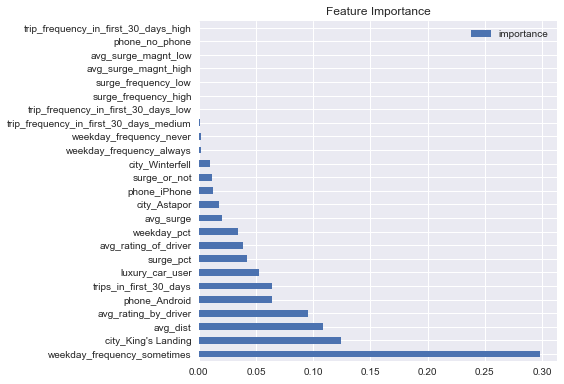

In [103]:
ax = df_imp.plot.barh()
t = np.arange(X.shape[1])
ax.set_yticks(t)
ax.set_yticklabels(df_imp['feature'])
plt.title('Feature Importance')
plt.tight_layout()
plt.savefig('rf_feature_score')
plt.show()


## Xgboost

In [80]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [81]:
dtrain = pd.DataFrame(X_train)
dtrain.columns = selected_features
dtrain_target = pd.DataFrame(y_train)
dtrain_target.columns = ['churn']
dtrain = pd.concat([dtrain, dtrain_target], axis=1)
dtest = pd.DataFrame(X_test)
dtest.columns = selected_features
dtest_target = pd.DataFrame(y_test)
dtest_target.columns = ['churn']
dtest = pd.concat([dtest, dtest_target], axis=1)


In [84]:
def modelfit(alg, dtrain, dtest, selected_features, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[selected_features].values, label=dtrain['churn'].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds, verbose_eval = True)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[selected_features], dtrain['churn'],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[selected_features])
    dtrain_predprob = alg.predict_proba(dtrain[selected_features])[:,1]
    dtest_predictions = alg.predict(dtest[selected_features])
    dtest_predprob = alg.predict_proba(dtest[selected_features])[:,1]
        
    #Print model report:
    print "\nModel Report"
    print "AUC Score (Train): %f" % roc_auc_score(dtrain['churn'], dtrain_predprob)
    print "AUC Score (Test): %f" % roc_auc_score(dtest['churn'], dtest_predprob)
    
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='barh', title='Feature Importances')
    plt.xlabel('Feature Importance Score')
    plt.savefig('xgb_feature_score')

[0]	train-auc:0.82989+0.00129445	test-auc:0.826931+0.00510677
[1]	train-auc:0.834901+0.00175719	test-auc:0.832579+0.00509969
[2]	train-auc:0.838317+0.00210696	test-auc:0.835737+0.00491288
[3]	train-auc:0.841909+0.00243816	test-auc:0.839488+0.00507993
[4]	train-auc:0.844108+0.00138425	test-auc:0.84162+0.00642442
[5]	train-auc:0.845106+0.00142577	test-auc:0.842342+0.00690154
[6]	train-auc:0.845884+0.00145731	test-auc:0.842958+0.00650279
[7]	train-auc:0.847111+0.00173736	test-auc:0.843873+0.00602572
[8]	train-auc:0.847803+0.00156481	test-auc:0.844565+0.005896
[9]	train-auc:0.848402+0.00141399	test-auc:0.844675+0.00574523
[10]	train-auc:0.849438+0.0012834	test-auc:0.845433+0.00555364
[11]	train-auc:0.849811+0.00127248	test-auc:0.845749+0.00562518
[12]	train-auc:0.850525+0.00141096	test-auc:0.846246+0.00536099
[13]	train-auc:0.851348+0.00142078	test-auc:0.846886+0.00556729
[14]	train-auc:0.851969+0.00134804	test-auc:0.847349+0.00536134
[15]	train-auc:0.852571+0.00127466	test-auc:0.847817+0.

[128]	train-auc:0.881685+0.000780744	test-auc:0.85997+0.00453271
[129]	train-auc:0.881786+0.000795522	test-auc:0.859974+0.00452438
[130]	train-auc:0.881895+0.000761051	test-auc:0.859955+0.00450541
[131]	train-auc:0.882047+0.000768002	test-auc:0.860034+0.00451354
[132]	train-auc:0.882145+0.000763002	test-auc:0.86001+0.00450864
[133]	train-auc:0.882288+0.000761392	test-auc:0.86+0.00455732
[134]	train-auc:0.882371+0.000792782	test-auc:0.86002+0.00454324
[135]	train-auc:0.882545+0.000832932	test-auc:0.860067+0.00449972
[136]	train-auc:0.882707+0.000854806	test-auc:0.860083+0.00446352
[137]	train-auc:0.882868+0.000874289	test-auc:0.86009+0.00447361
[138]	train-auc:0.882976+0.000861314	test-auc:0.860071+0.00448134
[139]	train-auc:0.883148+0.000802149	test-auc:0.860052+0.00451382
[140]	train-auc:0.883226+0.000763816	test-auc:0.860087+0.00452583
[141]	train-auc:0.883335+0.00076726	test-auc:0.860104+0.00452687
[142]	train-auc:0.883417+0.000744829	test-auc:0.860093+0.00455158
[143]	train-auc:0.8

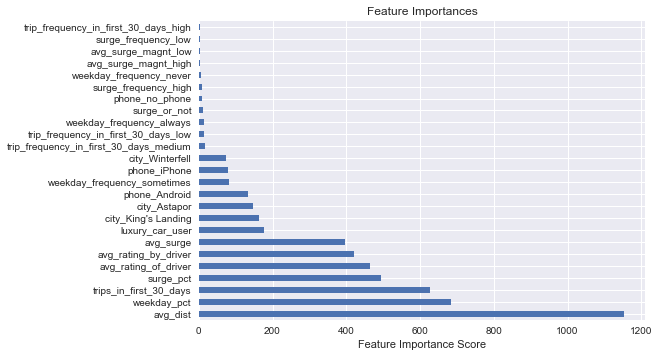

In [85]:
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb1, dtrain, dtest, selected_features)

In [86]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=240, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_train, y_train)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_


/Users/zhangtianqi/anaconda/lib/python2.7/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.85705, std: 0.00424, params: {'max_depth': 3, 'min_child_weight': 1},
  mean: 0.85698, std: 0.00438, params: {'max_depth': 3, 'min_child_weight': 3},
  mean: 0.85681, std: 0.00424, params: {'max_depth': 3, 'min_child_weight': 5},
  mean: 0.86000, std: 0.00489, params: {'max_depth': 5, 'min_child_weight': 1},
  mean: 0.86029, std: 0.00527, params: {'max_depth': 5, 'min_child_weight': 3},
  mean: 0.86057, std: 0.00486, params: {'max_depth': 5, 'min_child_weight': 5},
  mean: 0.85792, std: 0.00508, params: {'max_depth': 7, 'min_child_weight': 1},
  mean: 0.85861, std: 0.00562, params: {'max_depth': 7, 'min_child_weight': 3},
  mean: 0.85886, std: 0.00498, params: {'max_depth': 7, 'min_child_weight': 5},
  mean: 0.85257, std: 0.00524, params: {'max_depth': 9, 'min_child_weight': 1},
  mean: 0.85402, std: 0.00513, params: {'max_depth': 9, 'min_child_weight': 3},
  mean: 0.85487, std: 0.00531, params: {'max_depth': 9, 'min_child_weight': 5}],
 {'max_depth': 5, 'min_child_weight': 5

In [87]:
param_test2 = {
 'max_depth':[4,5,6],
 'min_child_weight':[4,5,6,7]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=240, max_depth=5,
 min_child_weight=5, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(X_train, y_train)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

/Users/zhangtianqi/anaconda/lib/python2.7/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.85934, std: 0.00456, params: {'max_depth': 4, 'min_child_weight': 4},
  mean: 0.85926, std: 0.00473, params: {'max_depth': 4, 'min_child_weight': 5},
  mean: 0.85944, std: 0.00478, params: {'max_depth': 4, 'min_child_weight': 6},
  mean: 0.85945, std: 0.00453, params: {'max_depth': 4, 'min_child_weight': 7},
  mean: 0.86055, std: 0.00490, params: {'max_depth': 5, 'min_child_weight': 4},
  mean: 0.86057, std: 0.00486, params: {'max_depth': 5, 'min_child_weight': 5},
  mean: 0.86039, std: 0.00503, params: {'max_depth': 5, 'min_child_weight': 6},
  mean: 0.86027, std: 0.00502, params: {'max_depth': 5, 'min_child_weight': 7},
  mean: 0.85969, std: 0.00491, params: {'max_depth': 6, 'min_child_weight': 4},
  mean: 0.85996, std: 0.00501, params: {'max_depth': 6, 'min_child_weight': 5},
  mean: 0.85992, std: 0.00550, params: {'max_depth': 6, 'min_child_weight': 6},
  mean: 0.85980, std: 0.00522, params: {'max_depth': 6, 'min_child_weight': 7}],
 {'max_depth': 5, 'min_child_weight': 5

In [88]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=240, max_depth=5,
 min_child_weight=5, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(X_train, y_train)
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_


/Users/zhangtianqi/anaconda/lib/python2.7/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.86057, std: 0.00486, params: {'gamma': 0.0},
  mean: 0.86056, std: 0.00496, params: {'gamma': 0.1},
  mean: 0.86037, std: 0.00481, params: {'gamma': 0.2},
  mean: 0.86036, std: 0.00474, params: {'gamma': 0.3},
  mean: 0.86035, std: 0.00456, params: {'gamma': 0.4}],
 {'gamma': 0.0},
 0.8605738538601313)

[0]	train-auc:0.829933+0.00131097	test-auc:0.827081+0.0050372
[1]	train-auc:0.834932+0.00172844	test-auc:0.832633+0.00508572
[2]	train-auc:0.838315+0.00210777	test-auc:0.835806+0.00483573
[3]	train-auc:0.841901+0.00242003	test-auc:0.839542+0.00501989
[4]	train-auc:0.844086+0.00136787	test-auc:0.841655+0.00640303
[5]	train-auc:0.845085+0.00141208	test-auc:0.842358+0.00685877
[6]	train-auc:0.845837+0.00143431	test-auc:0.842898+0.00645023
[7]	train-auc:0.847078+0.0017111	test-auc:0.843869+0.00597573
[8]	train-auc:0.847746+0.00157161	test-auc:0.844531+0.00588671
[9]	train-auc:0.848345+0.00140857	test-auc:0.844629+0.00574127
[10]	train-auc:0.849396+0.00126355	test-auc:0.845392+0.00556711
[11]	train-auc:0.849801+0.00127213	test-auc:0.845786+0.0055979
[12]	train-auc:0.85052+0.00139338	test-auc:0.846306+0.00536206
[13]	train-auc:0.851305+0.00141922	test-auc:0.846941+0.00561402
[14]	train-auc:0.851921+0.00141296	test-auc:0.84734+0.00532781
[15]	train-auc:0.852524+0.00126258	test-auc:0.847854+0.

[128]	train-auc:0.880016+0.00117827	test-auc:0.859879+0.00412504
[129]	train-auc:0.880089+0.0011834	test-auc:0.859874+0.00408926
[130]	train-auc:0.880235+0.00118637	test-auc:0.859897+0.00407207
[131]	train-auc:0.880376+0.00121216	test-auc:0.859944+0.00407165
[132]	train-auc:0.880467+0.00119663	test-auc:0.859938+0.00408446
[133]	train-auc:0.880584+0.00115868	test-auc:0.859962+0.00410451
[134]	train-auc:0.880692+0.00115063	test-auc:0.859972+0.00412669
[135]	train-auc:0.880841+0.00118218	test-auc:0.860051+0.00408831
[136]	train-auc:0.880972+0.00120678	test-auc:0.860065+0.00408524
[137]	train-auc:0.881102+0.00119114	test-auc:0.860075+0.00407823
[138]	train-auc:0.881221+0.00115041	test-auc:0.860074+0.00407685
[139]	train-auc:0.88135+0.00109985	test-auc:0.860078+0.00410842
[140]	train-auc:0.881446+0.00107482	test-auc:0.860092+0.00411867
[141]	train-auc:0.881549+0.0010781	test-auc:0.860108+0.00410559
[142]	train-auc:0.881635+0.00105487	test-auc:0.860105+0.00413748
[143]	train-auc:0.881743+0.0

[255]	train-auc:0.891998+0.00108802	test-auc:0.860635+0.00364005
[256]	train-auc:0.892041+0.00109465	test-auc:0.860623+0.00363847
[257]	train-auc:0.892107+0.00110412	test-auc:0.860634+0.00364605
[258]	train-auc:0.89218+0.00110256	test-auc:0.860652+0.00365627
[259]	train-auc:0.892245+0.00110558	test-auc:0.860648+0.00363741
[260]	train-auc:0.892307+0.00110304	test-auc:0.860623+0.0036233
[261]	train-auc:0.892376+0.00109507	test-auc:0.860612+0.00361627
[262]	train-auc:0.89246+0.00110521	test-auc:0.860599+0.00362432
[263]	train-auc:0.892531+0.00110499	test-auc:0.860584+0.00361858
[264]	train-auc:0.892613+0.00110532	test-auc:0.86059+0.00359576
[265]	train-auc:0.892697+0.00109644	test-auc:0.860584+0.00359268
[266]	train-auc:0.892799+0.00110475	test-auc:0.860629+0.00353236
[267]	train-auc:0.892878+0.00109344	test-auc:0.860615+0.00353062
[268]	train-auc:0.892949+0.00108503	test-auc:0.8606+0.00349351
[269]	train-auc:0.893025+0.00109832	test-auc:0.860628+0.00348278
[270]	train-auc:0.893104+0.0010

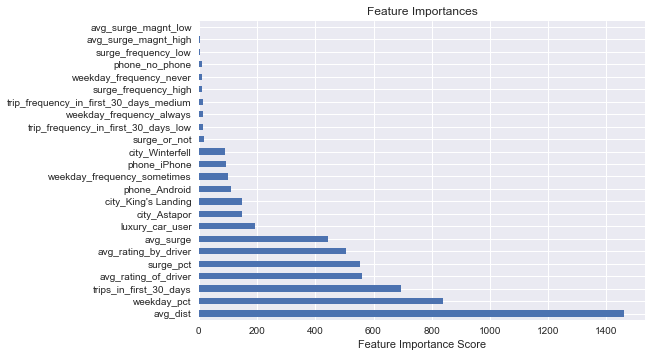

In [91]:
xgb2 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=5,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb2, dtrain, dtest, selected_features)

In [94]:
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=307, max_depth=5,
 min_child_weight=5, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(X_train, y_train)
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

/Users/zhangtianqi/anaconda/lib/python2.7/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.85972, std: 0.00458, params: {'subsample': 0.6, 'colsample_bytree': 0.6},
  mean: 0.85999, std: 0.00454, params: {'subsample': 0.7, 'colsample_bytree': 0.6},
  mean: 0.86095, std: 0.00482, params: {'subsample': 0.8, 'colsample_bytree': 0.6},
  mean: 0.86115, std: 0.00425, params: {'subsample': 0.9, 'colsample_bytree': 0.6},
  mean: 0.85955, std: 0.00453, params: {'subsample': 0.6, 'colsample_bytree': 0.7},
  mean: 0.86041, std: 0.00483, params: {'subsample': 0.7, 'colsample_bytree': 0.7},
  mean: 0.86076, std: 0.00476, params: {'subsample': 0.8, 'colsample_bytree': 0.7},
  mean: 0.86101, std: 0.00478, params: {'subsample': 0.9, 'colsample_bytree': 0.7},
  mean: 0.85903, std: 0.00471, params: {'subsample': 0.6, 'colsample_bytree': 0.8},
  mean: 0.85973, std: 0.00463, params: {'subsample': 0.7, 'colsample_bytree': 0.8},
  mean: 0.86034, std: 0.00475, params: {'subsample': 0.8, 'colsample_bytree': 0.8},
  mean: 0.86063, std: 0.00519, params: {'subsample': 0.9, 'colsample_bytree'

In [95]:
param_test5 = {
 'subsample':[i/100.0 for i in range(90,105,5)],
 'colsample_bytree':[i/100.0 for i in range(50,70,5)]
}
gsearch5 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=307, max_depth=5,
 min_child_weight=5, gamma=0, subsample=0.9, colsample_bytree=0.6,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch5.fit(X_train, y_train)
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

/Users/zhangtianqi/anaconda/lib/python2.7/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.86154, std: 0.00479, params: {'subsample': 0.9, 'colsample_bytree': 0.5},
  mean: 0.86125, std: 0.00457, params: {'subsample': 0.95, 'colsample_bytree': 0.5},
  mean: 0.86081, std: 0.00440, params: {'subsample': 1.0, 'colsample_bytree': 0.5},
  mean: 0.86115, std: 0.00433, params: {'subsample': 0.9, 'colsample_bytree': 0.55},
  mean: 0.86160, std: 0.00441, params: {'subsample': 0.95, 'colsample_bytree': 0.55},
  mean: 0.86129, std: 0.00465, params: {'subsample': 1.0, 'colsample_bytree': 0.55},
  mean: 0.86115, std: 0.00425, params: {'subsample': 0.9, 'colsample_bytree': 0.6},
  mean: 0.86138, std: 0.00472, params: {'subsample': 0.95, 'colsample_bytree': 0.6},
  mean: 0.86110, std: 0.00465, params: {'subsample': 1.0, 'colsample_bytree': 0.6},
  mean: 0.86108, std: 0.00403, params: {'subsample': 0.9, 'colsample_bytree': 0.65},
  mean: 0.86094, std: 0.00482, params: {'subsample': 0.95, 'colsample_bytree': 0.65},
  mean: 0.86102, std: 0.00419, params: {'subsample': 1.0, 'colsampl

In [96]:
param_test6 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=307, max_depth=5,
 min_child_weight=5, gamma=0, subsample=0.95, colsample_bytree=0.55,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test6, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch6.fit(X_train, y_train)
gsearch6.grid_scores_, gsearch6.best_params_, gsearch6.best_score_

/Users/zhangtianqi/anaconda/lib/python2.7/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.86155, std: 0.00435, params: {'reg_alpha': 1e-05},
  mean: 0.86162, std: 0.00434, params: {'reg_alpha': 0.01},
  mean: 0.86168, std: 0.00500, params: {'reg_alpha': 0.1},
  mean: 0.86213, std: 0.00485, params: {'reg_alpha': 1},
  mean: 0.85010, std: 0.00387, params: {'reg_alpha': 100}],
 {'reg_alpha': 1},
 0.86212506539259626)

[0]	train-auc:0.807991+0.000945874	test-auc:0.805212+0.00299203
[1]	train-auc:0.829207+0.00504314	test-auc:0.826429+0.00517966
[2]	train-auc:0.83186+0.00370938	test-auc:0.82845+0.00498692
[3]	train-auc:0.836154+0.00368948	test-auc:0.833114+0.00659456
[4]	train-auc:0.839531+0.00161671	test-auc:0.836773+0.00609514
[5]	train-auc:0.841709+0.0022035	test-auc:0.838725+0.00448125
[6]	train-auc:0.843931+0.00283992	test-auc:0.840726+0.00400283
[7]	train-auc:0.845511+0.00253765	test-auc:0.842306+0.00411175
[8]	train-auc:0.847039+0.00176053	test-auc:0.843474+0.00445729
[9]	train-auc:0.848105+0.00144389	test-auc:0.844305+0.00449189
[10]	train-auc:0.848902+0.0018453	test-auc:0.844972+0.0045001
[11]	train-auc:0.849393+0.00188942	test-auc:0.845409+0.00422094
[12]	train-auc:0.849859+0.00176833	test-auc:0.845778+0.00397527
[13]	train-auc:0.850206+0.0017044	test-auc:0.845986+0.00396554
[14]	train-auc:0.85067+0.00185746	test-auc:0.846399+0.00374117
[15]	train-auc:0.851329+0.00161505	test-auc:0.847111+0.0

[128]	train-auc:0.877806+0.000868977	test-auc:0.8602+0.00347985
[129]	train-auc:0.877931+0.000884847	test-auc:0.860229+0.0034659
[130]	train-auc:0.878056+0.000880737	test-auc:0.860301+0.00345652
[131]	train-auc:0.878169+0.000838405	test-auc:0.86037+0.00350311
[132]	train-auc:0.878253+0.000832874	test-auc:0.860373+0.0035174
[133]	train-auc:0.878354+0.000820493	test-auc:0.860385+0.00350717
[134]	train-auc:0.878463+0.000821147	test-auc:0.860398+0.00348985
[135]	train-auc:0.878558+0.000796928	test-auc:0.860411+0.00350375
[136]	train-auc:0.878714+0.000855093	test-auc:0.860465+0.00347245
[137]	train-auc:0.878806+0.000830801	test-auc:0.860444+0.00347479
[138]	train-auc:0.87889+0.000853828	test-auc:0.860437+0.00345587
[139]	train-auc:0.878972+0.000860678	test-auc:0.860429+0.00345981
[140]	train-auc:0.879097+0.000911743	test-auc:0.860464+0.00345976
[141]	train-auc:0.879228+0.000932911	test-auc:0.860499+0.00347033
[142]	train-auc:0.879328+0.0009473	test-auc:0.860473+0.00344832
[143]	train-auc:0.

[254]	train-auc:0.889305+0.000877849	test-auc:0.861962+0.00321782
[255]	train-auc:0.889381+0.000869833	test-auc:0.861953+0.00320913
[256]	train-auc:0.889457+0.000854367	test-auc:0.86194+0.00322076
[257]	train-auc:0.889517+0.000876877	test-auc:0.861948+0.00322356
[258]	train-auc:0.88958+0.000868187	test-auc:0.861948+0.00323444
[259]	train-auc:0.889656+0.000861832	test-auc:0.861941+0.00325212
[260]	train-auc:0.889748+0.000861507	test-auc:0.861937+0.00325997
[261]	train-auc:0.889807+0.000867941	test-auc:0.86197+0.00324658
[262]	train-auc:0.889891+0.000862782	test-auc:0.86198+0.00323138
[263]	train-auc:0.889947+0.000864218	test-auc:0.861961+0.00322752
[264]	train-auc:0.890055+0.000865074	test-auc:0.862022+0.00317696
[265]	train-auc:0.890119+0.000853157	test-auc:0.862023+0.00318276
[266]	train-auc:0.890178+0.000852766	test-auc:0.861999+0.00317382
[267]	train-auc:0.89025+0.00085865	test-auc:0.861967+0.00317164
[268]	train-auc:0.890318+0.000852198	test-auc:0.861974+0.00316942
[269]	train-auc:

[379]	train-auc:0.897328+0.000877175	test-auc:0.861985+0.00318714
[380]	train-auc:0.89739+0.000866574	test-auc:0.861985+0.00317715
[381]	train-auc:0.897459+0.000869792	test-auc:0.861975+0.00317118
[382]	train-auc:0.89752+0.000842627	test-auc:0.861977+0.00319244
[383]	train-auc:0.897584+0.000828204	test-auc:0.861977+0.00318412
[384]	train-auc:0.897623+0.000840835	test-auc:0.861965+0.00317159
[385]	train-auc:0.897657+0.000821232	test-auc:0.861958+0.00316191
[386]	train-auc:0.897702+0.00083067	test-auc:0.861959+0.00316629
[387]	train-auc:0.897768+0.000828138	test-auc:0.861959+0.00316818
[388]	train-auc:0.897844+0.000824576	test-auc:0.861939+0.00315995
[389]	train-auc:0.897894+0.000817835	test-auc:0.861953+0.00315311
[390]	train-auc:0.897938+0.000823271	test-auc:0.861957+0.00317054
[391]	train-auc:0.897992+0.000819523	test-auc:0.861951+0.00316915
[392]	train-auc:0.898052+0.000825852	test-auc:0.861959+0.00315117
[393]	train-auc:0.898131+0.000824531	test-auc:0.861942+0.00315344
[394]	train-a

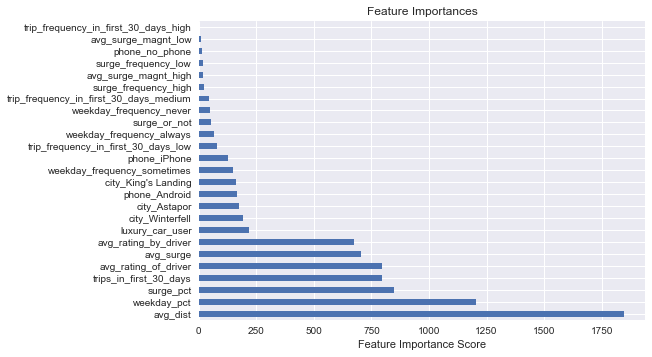

In [97]:
xgb3 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=5,
 gamma=0,
 subsample=0.95,
 colsample_bytree=0.55,
 reg_alpha=1,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb3, dtrain, dtest, selected_features)

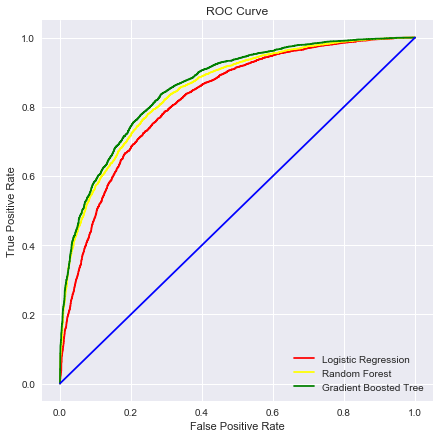

In [151]:
# Plot ROC Curve of three models
from sklearn.metrics import roc_curve

lr_y_test_pred_proba = lr.predict_proba(X_test_scaled)[:,1]
rf_y_test_pred_proba = rf.predict_proba(X_test)[:,1]
xgb_y_test_pred_proba = xgb3.predict_proba(dtest[selected_features])[:,1]

lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_test, lr_y_test_pred_proba)
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_y_test_pred_proba)
xgb_fpr, xgb_tpr, xgb_thresholds = roc_curve(y_test, xgb_y_test_pred_proba)


# plot TPR against FPR
plt.figure(figsize=(7,7))
lr_plot = plt.plot(lr_fpr, lr_tpr, color='red')
rf_plot = plt.plot(rf_fpr, rf_tpr, color='yellow')
gbt_plot = plt.plot(xgb_fpr, xgb_tpr, color='green')
plt.legend(['Logistic Regression', 'Random Forest','Gradient Boosted Tree'],loc='lower right')

# plot 45 degree line
xx = np.linspace(0, 1.0, 20)
plt.plot(xx, xx, color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.savefig('ROC')
plt.show()